# What are the top grossing films by language worldwide?

What are the top grossing films by language worldwide?<br><br>
Top grossing non-English films<br>
 vs. net profits<br><br>
Top grossing non-English films by genre<br>
 vs. net profits

## import the data

In [12]:
#necessary imports

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [13]:
#changing the display settings in dataframes to only format floats and display columns

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', 100)

In [14]:
#importing data using glob

datafiles = glob("./zippedData/*.csv.gz")
datafiles

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\rt.movie_info.csv.gz',
 './zippedData\\rt.reviews.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [15]:
datafiles_dict = {}
for filename in datafiles:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".gz", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename)
    datafiles_dict[filename_cleaned] = filename_df

In [16]:
print(datafiles_dict.keys())

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'rt_movie_info', 'rt_reviews', 'tmdb_movies', 'tn_movie_budgets'])


In [17]:
tmdb_mglb_df = pd.read_csv('tmdb_mglb.csv') #load in dataset in csv to dataframe
tmdb_mglb_df = tmdb_mglb_df.drop(['Unnamed: 0', 'movie', 'title'], axis=1) #drop columns

tmdb_mglb_df.head() #call first 5 rows

,id,original_title,popularity,release_date_x,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,original_language,release_date_y,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,7.70,10788,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,NaN,nan,nan,nan,nan,nan
1,10191,How to Train Your Dragon,28.73,2010-03-26,7.70,7610,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Mar 26, 2010",165000000.00,217581232.00,494870992.00,52581232.00,329870992.00
2,10138,Iron Man 2,28.52,2010-05-07,6.80,12368,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"May 7, 2010",170000000.00,312433331.00,621156389.00,142433331.00,451156389.00
3,862,Toy Story,28.00,1995-11-22,7.90,10174,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English,"Nov 22, 1995",30000000.00,191796233.00,364545516.00,161796233.00,334545516.00
4,27205,Inception,27.92,2010-07-16,8.30,22186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"Jul 16, 2010",160000000.00,292576195.00,835524642.00,132576195.00,675524642.00


In [21]:
tmdb_mglb_df_clean = tmdb_mglb_df = tmdb_mglb_df.dropna()
tmdb_mglb_df_clean = tmdb_mglb_df_clean.drop_duplicates(subset='original_title', keep='first')
tmdb_mglb_df_clean = tmdb_mglb_df_clean[~tmdb_mglb_df_clean['original_language'].isin(['English'])]

In [22]:
tmdb_mglb_df_clean

,id,original_title,popularity,release_date_x,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,original_language,release_date_y,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
73,25376,El secreto de sus ojos,12.53,2010-04-16,7.90,1141,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,Spanish,"Apr 16, 2010",3500000.00,6391436.00,40527719.00,2891436.00,37027719.00
173,50135,Konferenz der Tiere,9.26,2010-10-07,5.40,151,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,German,"Dec 31, 2010",30000000.00,0.00,53048539.00,-30000000.00,23048539.00
186,46738,Incendies,8.97,2010-09-04,8.10,1034,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,French,"Sep 17, 2010",6800000.00,6857096.00,16038343.00,57096.00,9238343.00
222,41201,L'illusionniste,8.40,2010-12-25,7.40,280,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,French,"Dec 25, 2010",17000000.00,2231474.00,8609949.00,-14768526.00,-8390051.00
272,45958,Biutiful,7.70,2010-12-28,7.20,546,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Spanish,"Jan 28, 2011",35000000.00,5101237.00,24687524.00,-29898763.00,-10312476.00
386,37737,Kites,6.06,2010-05-21,5.80,67,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Hindi,"May 21, 2010",9200000.00,1685269.00,17155193.00,-7514731.00,7955193.00
2407,128184,Trash,0.60,2010-11-03,3.00,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Spanish,"Oct 9, 2015",12000000.00,17484.00,6553186.00,-11982516.00,-5446814.00
2506,387,Das Boot,16.55,1982-02-10,8.10,981,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,German,"Feb 10, 1982",12000000.00,11487676.00,84970337.00,-512324.00,72970337.00
2605,62215,Melancholia,11.12,2011-11-11,7.10,1642,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,Danish,"Nov 11, 2011",9400000.00,3030848.00,21817298.00,-6369152.00,12417298.00
2640,77635,Miss Bala,10.13,2011-10-01,6.30,50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Spanish,"Feb 1, 2019",15000000.00,14998027.00,15362298.00,-1973.00,362298.00


In [23]:
lang_df = tmdb_mglb_df_clean.loc[:, ['original_title', 'original_language', 'release_date_x', 'production_budget', 'domestic_gross', 'worldwide_gross', 'total_net']]
lang_df

,original_title,original_language,release_date_x,production_budget,domestic_gross,worldwide_gross,total_net
73,El secreto de sus ojos,Spanish,2010-04-16,3500000.00,6391436.00,40527719.00,37027719.00
173,Konferenz der Tiere,German,2010-10-07,30000000.00,0.00,53048539.00,23048539.00
186,Incendies,French,2010-09-04,6800000.00,6857096.00,16038343.00,9238343.00
222,L'illusionniste,French,2010-12-25,17000000.00,2231474.00,8609949.00,-8390051.00
272,Biutiful,Spanish,2010-12-28,35000000.00,5101237.00,24687524.00,-10312476.00
386,Kites,Hindi,2010-05-21,9200000.00,1685269.00,17155193.00,7955193.00
2407,Trash,Spanish,2010-11-03,12000000.00,17484.00,6553186.00,-5446814.00
2506,Das Boot,German,1982-02-10,12000000.00,11487676.00,84970337.00,72970337.00
2605,Melancholia,Danish,2011-11-11,9400000.00,3030848.00,21817298.00,12417298.00
2640,Miss Bala,Spanish,2011-10-01,15000000.00,14998027.00,15362298.00,362298.00


In [24]:
langne_df = lang_df[~lang_df['original_language'].isin(['English'])]
langne_df

,original_title,original_language,release_date_x,production_budget,domestic_gross,worldwide_gross,total_net
73,El secreto de sus ojos,Spanish,2010-04-16,3500000.00,6391436.00,40527719.00,37027719.00
173,Konferenz der Tiere,German,2010-10-07,30000000.00,0.00,53048539.00,23048539.00
186,Incendies,French,2010-09-04,6800000.00,6857096.00,16038343.00,9238343.00
222,L'illusionniste,French,2010-12-25,17000000.00,2231474.00,8609949.00,-8390051.00
272,Biutiful,Spanish,2010-12-28,35000000.00,5101237.00,24687524.00,-10312476.00
386,Kites,Hindi,2010-05-21,9200000.00,1685269.00,17155193.00,7955193.00
2407,Trash,Spanish,2010-11-03,12000000.00,17484.00,6553186.00,-5446814.00
2506,Das Boot,German,1982-02-10,12000000.00,11487676.00,84970337.00,72970337.00
2605,Melancholia,Danish,2011-11-11,9400000.00,3030848.00,21817298.00,12417298.00
2640,Miss Bala,Spanish,2011-10-01,15000000.00,14998027.00,15362298.00,362298.00


In [25]:
langne_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 73 to 24895
Data columns (total 7 columns):
original_title       64 non-null object
original_language    64 non-null object
release_date_x       64 non-null object
production_budget    64 non-null float64
domestic_gross       64 non-null float64
worldwide_gross      64 non-null float64
total_net            64 non-null float64
dtypes: float64(4), object(3)
memory usage: 4.0+ KB


In [26]:
langne_df.dtypes

original_title        object
original_language     object
release_date_x        object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
total_net            float64
dtype: object

In [27]:
cols = list(tmdb_mglb_df.columns) #create a list of column labels

In [28]:
genre_cols = cols[6:25] #create new list, genre_cols, using value in cols list 

In [29]:
#create a dictionary with genre counts

genre_count = {} #set genre_count as a new dictionary 
for col in genre_cols: #for col in genre_cols list
    count = np.sum(tmdb_mglb_df[col] == 1).sum() #set count as the sum of all the dataframe cols that are equal to 1
    genre_count[col] = count #set the values of each genre_count key to 'count'

In [30]:
genre_count

{'Fantasy': 219,
 'Drama': 1057,
 'War': 56,
 'Mystery': 172,
 'Comedy': 656,
 'Romance': 265,
 'Family': 222,
 'Music': 62,
 'Documentary': 86,
 'Animation': 145,
 'Western': 27,
 'Action': 534,
 'Crime': 287,
 'Thriller': 636,
 'TV Movie': 10,
 'Adventure': 362,
 'History': 89,
 'Science Fiction': 269,
 'Horror': 313}

In [31]:
genrekey = list(genre_count.keys()) #create var 'keys' set as a list of the genre_count dict keys
genrevalue = list(genre_count.values()) #create var 'values' set as a list of the genre_count dict values

In [32]:
genre_df = pd.DataFrame.from_dict(genre_count, orient='index', columns=['genre_count'])
genre_df = genre_df.sort_values(by=['genre_count'], ascending=False)
genre_df = genre_df.rename_axis('genre').reset_index()
genre_df

,genre,genre_count
0,Drama,1057
1,Comedy,656
2,Thriller,636
3,Action,534
4,Adventure,362
5,Horror,313
6,Crime,287
7,Science Fiction,269
8,Romance,265
9,Family,222


In [33]:
langcount = langne_df.groupby('original_language').count()
langcountsort = langcount.sort_values(by=['original_title'], ascending=False)
langcountsort = langcountsort.reset_index()
langcountsort.loc[0:6]

langcountne = langcountsort.loc[1:6]
langcountne

,original_language,original_title,release_date_x,production_budget,domestic_gross,worldwide_gross,total_net
1,Spanish,10,10,10,10,10,10
2,German,5,5,5,5,5,5
3,Portuguese,4,4,4,4,4,4
4,Hindi,3,3,3,3,3,3
5,Swedish,3,3,3,3,3,3
6,Finnish,2,2,2,2,2,2


In [34]:
langgrosssort = langne_df.sort_values(by=['worldwide_gross'], ascending=False)
langgrosssort = langgrosssort.reset_index(drop=True)
lgsplot = langgrosssort.loc[0:9]
lgsplot

,original_title,original_language,release_date_x,production_budget,domestic_gross,worldwide_gross,total_net
0,2012,Japanese,2013-03-21,200000000.00,166112167.00,757677748.00,557677748.00
1,Baahubali 2: The Conclusion,Telugu,2017-04-27,30000000.00,18985794.00,263502914.00,233502914.00
2,No se Aceptan Devoluciones,Spanish,2013-08-30,5000000.00,44467206.00,100486616.00,95486616.00
3,Snowpiercer,Korean,2014-06-27,40000000.00,4563029.00,88069880.00,48069880.00
4,Das Boot,German,1982-02-10,12000000.00,11487676.00,84970337.00,72970337.00
5,Konferenz der Tiere,German,2010-10-07,30000000.00,0.00,53048539.00,23048539.00
6,El secreto de sus ojos,Spanish,2010-04-16,3500000.00,6391436.00,40527719.00,37027719.00
7,Amour,French,2012-12-19,9700000.00,6738954.00,36787044.00,27087044.00
8,Metegol,Spanish,2015-08-14,22000000.00,0.00,34061097.00,12061097.00
9,Superstar,French,2012-09-09,14000000.00,30628981.00,30628981.00,16628981.00


# What are the top grossing non-English films by language worldwide?

mov = langgrosssort.loc[:, 'original_title']
lang = langcountsort.loc[:, 'original_language']
langcount = langcountsort.loc[:, 'total_net']
gross = langgrosssort.loc[:, 'worldwide_gross']
net = langgrosssort.loc[:, 'total_net']
langsort = langgrosssort.loc[:, 'original_language']

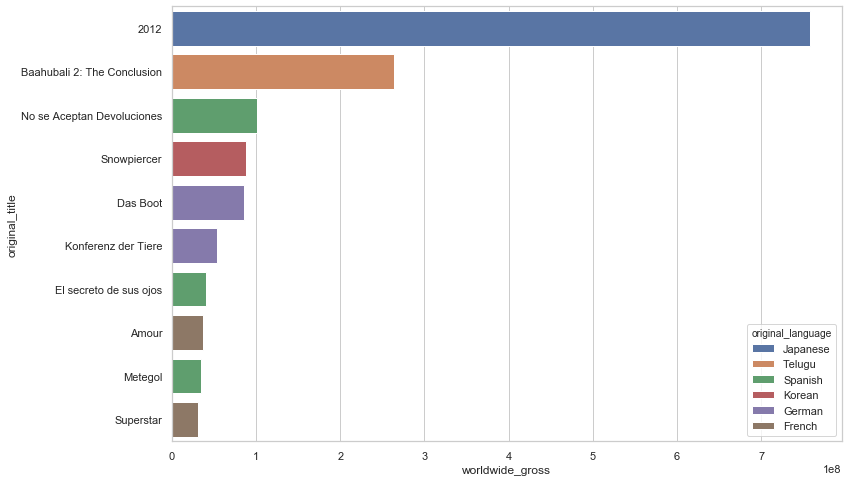

In [57]:
fig, ax =plt.subplots(figsize=(12, 8))
sns.set(style="whitegrid")

#sns.set_color_codes("pastel")
ax = sns.barplot(x='worldwide_gross', y='original_title', hue='original_language', data=lgsplot, dodge=False)

#sns.set_color_codes("muted")
#ax = sns.barplot(x='total_net', y='original_title', hue='original_language', data=lgsplot, dodge=False, color='b')

In [54]:
#g = sns.catplot(x="worldwide_gross", y="original_title", hue="original_language", data=lgsplot, 
#                height=6, kind="bar", palette="muted")
#g.despine(left=True)

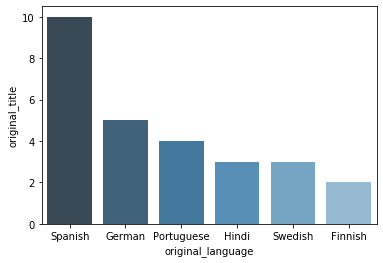

In [36]:
ax = sns.barplot(x='original_language', y='original_title', data=langcountne, palette="Blues_d")

***Findings***: write summary here